Here is the link for Peergrade: https://colab.research.google.com/drive/1G5YydyhH462uuwCUQK_DpTkzDhLjTwex


#0. Importing & Loading

In [0]:
#Network packages
import networkx as nx
from networkx.algorithms import bipartite 
import itertools

# Normal data-sci packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Loading files, naming columns and removing first nan column from txt files
df_att = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-Attributes.csv')
df_att.columns = [column.lower() for column in df_att.columns]

df_advice = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-Advice.txt', sep=' ', header = None)
df_advice = df_advice.iloc[:,1:]
df_advice.columns = ['ego', 'alter', 'advice_edge']

df_friendship = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-Friendship.txt', sep=' ', header = None)
df_friendship = df_friendship.iloc[:,1:]
df_friendship.columns = ['ego', 'alter', 'friendship_edge']

df_reports = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-ReportsTo.txt', sep=' ', header = None)
df_reports = df_reports.iloc[:,1:]
df_reports.columns = ['ego', 'alter', 'reports_edge']

In [3]:
#Setting index of attributes to id
df_att.set_index('id', inplace=True)
#Checking df for structure
df_advice.head()

,ego,alter,advice_edge
0,1,1,0
1,1,2,1
2,1,3,0
3,1,4,1
4,1,5,0


#1. Create a network

In [0]:
#Creating DiGraphs in which to fill with edges and nodes
A = nx.DiGraph()
F = nx.DiGraph()
R = nx.DiGraph()
G = nx.DiGraph()

In [0]:
#Remove entries in df without edge
df_advice_1 = df_advice[df_advice.advice_edge == 1]
#Add edges from df columns, use zip function to make them itterable so they can fit into the add_edges function
A.add_edges_from(zip(df_advice_1.ego, df_advice_1.alter), advice_edge=1)

#Do the same as before but for friendship
df_friendship_1 = df_friendship[df_friendship.friendship_edge == 1]
F.add_edges_from(zip(df_friendship_1.ego, df_friendship_1.alter), friendship_edge=1)

#Same as before
df_reports_1 = df_reports[df_reports.reports_edge == 1]
R.add_edges_from(zip(df_reports_1.ego, df_reports_1.alter), reports_edge=1)


In [0]:
#Creat a single graph with
G.add_edges_from(A.edges())
G.add_edges_from(F.edges())
G.add_edges_from(R.edges())

In [0]:
# Creating a dictionary from the Dataframe transponse that we can pass as note attributes for our graph
# Change type first to avoide, non type error
df_att = df_att.round().astype(int)
dict_att = df_att.T.to_dict()

# Setting node attributes
nx.set_node_attributes(G, dict_att)
nx.set_node_attributes(F, dict_att)
nx.set_node_attributes(A, dict_att)

# 2.1 Analysis of network
Getting the data ready for analysis

In [0]:
#Calculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

#Calculate in-degre-centrality and assign it as a node-attribute
indegree_centrality = nx.in_degree_centrality(G)
nx.set_node_attributes(G, indegree_centrality, 'inner')

#Calculate out-degre-centrality and assign it as a node-attribute
outdegree_centrality = nx.out_degree_centrality(G)
nx.set_node_attributes(G, outdegree_centrality, 'outer')

#Calculate transistivity and assign it as a node-attribute
transistivity = nx.transitivity(G)
nx.set_node_attributes(G, transistivity, 'transistivity')
#Calculate reciprocity and assign it as a node-attribute
reciprocity = nx.reciprocity(G)
nx.set_node_attributes(G, reciprocity, 'reciprocity')

#Calculate in-degre-centrality for later analysis
indegree_centrality_A = nx.in_degree_centrality(A)
nx.set_node_attributes(A, indegree_centrality_A, 'inner')
indegree_centrality_F = nx.in_degree_centrality(F)
nx.set_node_attributes(F, indegree_centrality_F, 'inner')
degree_centrality_A = nx.degree_centrality(A)
nx.set_node_attributes(A, degree_centrality, 'degree')
degree_centrality_F = nx.degree_centrality(F)
nx.set_node_attributes(F, degree_centrality, 'degree')


In [0]:
#Store new impormation about the network in Tabular form
graph_G_df = pd.DataFrame(dict(G.nodes(data=True))).T
graph_A_df = pd.DataFrame(dict(A.nodes(data=True))).T
graph_F_df = pd.DataFrame(dict(F.nodes(data=True))).T

In [10]:
#Examine the new information
graph_G_df.head()

,age,degree,dept,inner,level,outer,reciprocity,tenure,transistivity
1,33.0,1.10,4.0,0.75,3.0,0.35,0.62931,9.0,0.560993
2,42.0,1.20,4.0,0.95,2.0,0.25,0.62931,20.0,0.560993
4,33.0,1.10,4.0,0.50,3.0,0.60,0.62931,8.0,0.560993
8,34.0,1.00,1.0,0.60,3.0,0.40,0.62931,11.0,0.560993
16,27.0,0.65,4.0,0.45,3.0,0.20,0.62931,5.0,0.560993


# A: Network level characteristics
    


In [11]:
print("the average degree of centrality is "+str(graph_G_df.degree.mean()))
print("the average reciprocity is "+str(nx.reciprocity(G)))
print("the average transistivity is "+str(nx.transitivity(G)))


the average degree of centrality is 1.1047619047619048
the average reciprocity is 0.6293103448275862
the average transistivity is 0.5609929078014184


Degree centrality of the total network doesn't make since, since there are three different notworks, so degree centrality for each of those networks is much more interesting.

In [12]:
#Are relationships like friendship and advice giving usually reciprocal?
print('friendship reciprocity '+str(nx.reciprocity(F))+' '+'advice reciprocity '+str(nx.reciprocity(A)))


friendship reciprocity 0.45098039215686275 advice reciprocity 0.47368421052631576


In [13]:
#    Are friends of your friends also your friends?
print('friendship transitivity '+str(nx.transitivity(F)))

friendship transitivity 0.27581863979848864


Its is more likely that friends of your friends are not your friends.

In [14]:
#Are the employees generally more likely to be in a friendship or advice-seeking relationship?
print('friendship centrality '+str(graph_F_df.degree.mean())+' '+'advice centrality '+str(graph_A_df.degree.mean()))

friendship centrality 1.1047619047619053 advice centrality 1.1047619047619048


#B: Node level characteristics

    Who is most popular in the networks. Who is the most wanted friend, and advice giver?
    
    Are managers in higher hirarchy more popular as friend, and advice giver?


In [15]:
#Who is most popular in the networks. Who is the most wanted friend, and advice giver?
#Find most popular person to ask for advice using in-degree centrality
graph_A_df.sort_values(by=['inner'], ascending=False).head()

,age,degree,dept,inner,level,tenure
2,42.0,1.2,4.0,0.90,2.0,20.0
18,33.0,1.7,3.0,0.75,2.0,9.0
21,36.0,1.3,1.0,0.75,2.0,12.0
1,33.0,1.1,4.0,0.65,3.0,9.0
7,55.0,1.1,0.0,0.65,1.0,30.0


In [16]:
graph_F_df.sort_values(by=['inner'], ascending=False).head()

,age,degree,dept,inner,level,tenure
2,42.0,1.20,4.0,0.5,2.0,20.0
1,33.0,1.10,4.0,0.4,3.0,9.0
12,34.0,0.90,1.0,0.4,3.0,9.0
11,46.0,1.35,3.0,0.3,3.0,27.0
9,62.0,1.10,2.0,0.3,3.0,5.0


In [17]:
graph_A_df.groupby('level').mean()

,age,degree,dept,inner,tenure
level,,,,,
1.0,55.0000,1.10000,0.00,0.650000,30.00
2.0,38.5000,1.25000,2.50,0.725000,12.75
3.0,39.0625,1.06875,2.25,0.371875,10.25


In [18]:
graph_F_df.groupby('level').mean()

,age,degree,dept,inner,tenure
level,,,,,
1.0,55.0000,1.10000,0.00,0.150000,30.00
2.0,38.5000,1.25000,2.50,0.300000,12.75
3.0,39.0625,1.06875,2.25,0.234375,10.25


#C: Relational Characteristics

    Are managers from the same 1. department, or on the same 2. hirarchy, 3. age, or 4. tenuere more likely to become friends or give advice? (hint: assortiativity related)
    
    Are friends more likely to give each others advice?


In [19]:
print('Advice dept '+str(nx.attribute_assortativity_coefficient(A,'dept')))
print('Friendship dept '+str(nx.attribute_assortativity_coefficient(F,'dept')))
print('Advice level '+str(nx.attribute_assortativity_coefficient(A,'level')))
print('Friendship level '+str(nx.attribute_assortativity_coefficient(F,'level')))
print('Advice age '+str(nx.attribute_assortativity_coefficient(A,'age')))
print('Friendship age '+str(nx.attribute_assortativity_coefficient(F,'age')))
print('Advice tenure '+str(nx.attribute_assortativity_coefficient(A,'tenure')))
print('Friendship tenure '+str(nx.attribute_assortativity_coefficient(F,'tenure')))

Advice dept 0.02390296111309304
Friendship dept 0.15908798145047023
Advice level 0.008073817762398955
Friendship level 0.18750000000000006
Advice age -0.03149370125974804
Friendship age -0.031914893617021274
Advice tenure -0.0515842169086782
Friendship tenure -0.06077348066298346


Calculate correlation, for friendship centrality given Advice centrality

#3. Aggregated Networks
Reconstruct the advice and friendship network on the aggregated level of departments, where nodes represent departments and edges the number of cross departmental friendships/advice relationships.

In [0]:
#Creates a list of edges with departments as nodes, given that the edge is from different departments
agg_F_edges=[(F.nodes[u]['dept'],F.nodes[v]['dept']) for (u,v) in F.edges if F.nodes[u]['dept']!=F.nodes[v]['dept']]

In [21]:
agg_F_edges

[(4, 1),
 (4, 1),
 (4, 3),
 (4, 1),
 (4, 1),
 (4, 1),
 (4, 1),
 (1, 4),
 (1, 4),
 (1, 4),
 (3, 4),
 (1, 4),
 (1, 3),
 (2, 0),
 (2, 4),
 (2, 4),
 (2, 3),
 (2, 1),
 (1, 4),
 (1, 4),
 (1, 2),
 (1, 4),
 (1, 2),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 3),
 (1, 2),
 (1, 2),
 (1, 4),
 (1, 2),
 (1, 2),
 (2, 4),
 (2, 3),
 (2, 1),
 (2, 1),
 (3, 4),
 (3, 4),
 (3, 2),
 (3, 4),
 (3, 2),
 (3, 1),
 (3, 2),
 (3, 1),
 (3, 2),
 (3, 2),
 (3, 1),
 (3, 2),
 (1, 4),
 (1, 0),
 (1, 2),
 (3, 2),
 (3, 2),
 (3, 1),
 (3, 2),
 (3, 1),
 (3, 4),
 (3, 2),
 (2, 3),
 (2, 3),
 (2, 3),
 (2, 4),
 (2, 1),
 (2, 3)]

In [0]:
agg_A_edges=[(A.nodes[u]['dept'],A.nodes[v]['dept']) for (u,v) in A.edges if A.nodes[u]['dept']!=A.nodes[v]['dept']]

In [23]:
agg_A_edges

[(4, 1),
 (4, 3),
 (4, 1),
 (4, 1),
 (4, 0),
 (4, 1),
 (4, 1),
 (4, 1),
 (4, 3),
 (4, 3),
 (4, 1),
 (4, 1),
 (4, 3),
 (4, 2),
 (4, 1),
 (1, 4),
 (1, 4),
 (1, 0),
 (1, 3),
 (1, 3),
 (1, 3),
 (4, 3),
 (4, 3),
 (3, 4),
 (3, 4),
 (3, 2),
 (3, 4),
 (3, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 4),
 (3, 2),
 (3, 2),
 (3, 1),
 (1, 4),
 (1, 2),
 (1, 4),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 2),
 (0, 4),
 (0, 1),
 (0, 3),
 (0, 1),
 (0, 2),
 (0, 1),
 (0, 3),
 (0, 1),
 (2, 4),
 (2, 4),
 (2, 4),
 (2, 1),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 3),
 (2, 1),
 (2, 1),
 (2, 3),
 (2, 1),
 (2, 4),
 (2, 4),
 (2, 1),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 3),
 (2, 1),
 (2, 4),
 (2, 1),
 (2, 3),
 (2, 1),
 (3, 4),
 (3, 4),
 (3, 2),
 (3, 4),
 (3, 2),
 (3, 1),
 (3, 2),
 (3, 2),
 (3, 4),
 (3, 1),
 (3, 2),
 (3, 2),
 (3, 4),
 (3, 4),
 (3, 0),
 (1, 0),
 (2, 4),
 (2, 0),
 (2, 3),
 (2, 1),
 (1, 4),
 (1, 4),
 (1, 4),
 (1, 0),
 (2, 4),
 (2, 4),
 (2, 1),
 (2, 1),
 (2, 3),
 (2, 1),
 (2, 4),
 (2, 1),
 (2, 3),
 (2, 1),
 

In [0]:
AggN = nx.MultiDiGraph()

In [25]:
AggN.add_edges_from(agg_A_edges)
AggN.add_edges_from(agg_F_edges)
AggN.nodes()



NodeView((4, 1, 3, 0, 2))

In [27]:
AggN.edges()

OutMultiEdgeDataView([(4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 0), (4, 2), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 0), (3, 0), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 1), (0, 4), (0, 1), (0, 1), (0, 1), (0, 1), (0, 3), (0, 3), (0, 2), (2

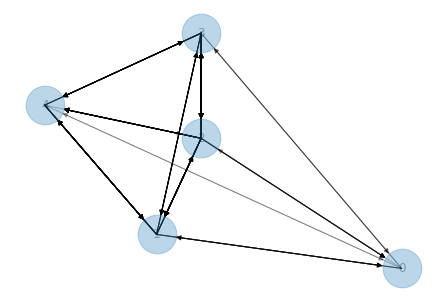

In [26]:
nx.draw(AggN, with_labels=True, node_size=1500, alpha=0.3, arrows=True)